In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# 7203
df = pd.read_csv('7203.T.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-06,3490.0,3610.0,3450.0,3610.0,2287.733154,3115000.0
1,1999-05-07,3590.0,3600.0,3450.0,3480.0,2205.349365,3033000.0
2,1999-05-10,3480.0,3520.0,3450.0,3470.0,2199.012207,1261000.0
3,1999-05-11,3500.0,3520.0,3440.0,3440.0,2180.000488,1686000.0
4,1999-05-12,3440.0,3500.0,3440.0,3500.0,2218.023682,2596000.0
...,...,...,...,...,...,...,...
5579,2021-07-28,9790.0,9869.0,9785.0,9804.0,9804.000000,4565000.0
5580,2021-07-29,9888.0,9934.0,9810.0,9856.0,9856.000000,4220000.0
5581,2021-07-30,9815.0,9896.0,9805.0,9805.0,9805.000000,5286400.0
5582,2021-08-02,9887.0,10035.0,9862.0,10030.0,10030.000000,5167700.0


In [4]:
n = 20

In [5]:
df = df.loc[df['Date'] > '2020-10-01']
len(df)

205

In [6]:
df['Volume'].fillna(0).astype('int')

5379    4895000
5380    4027200
5381    4710200
5382    4245200
5383    4820300
         ...   
5579    4565000
5580    4220000
5581    5286400
5582    5167700
5583    2562800
Name: Volume, Length: 205, dtype: int32

In [7]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

5379    4895.0
5380    4027.2
5381    4710.2
5382    4245.2
5383    4820.3
         ...  
5579    4565.0
5580    4220.0
5581    5286.4
5582    5167.7
5583    2562.8
Name: Volume, Length: 205, dtype: float64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\yoshi\anaconda3\envs\python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 5379 to 5583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       205 non-null    datetime64[ns]
 1   Open       205 non-null    float64       
 2   High       205 non-null    float64       
 3   Low        205 non-null    float64       
 4   Close      205 non-null    float64       
 5   Adj Close  205 non-null    float64       
 6   Volume     205 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.8 KB


<AxesSubplot:xlabel='Date'>

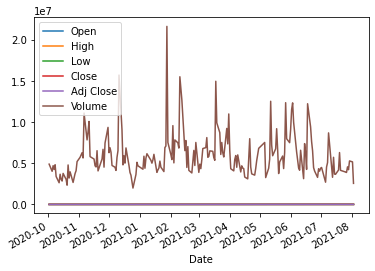

In [10]:
df.plot(x='Date')

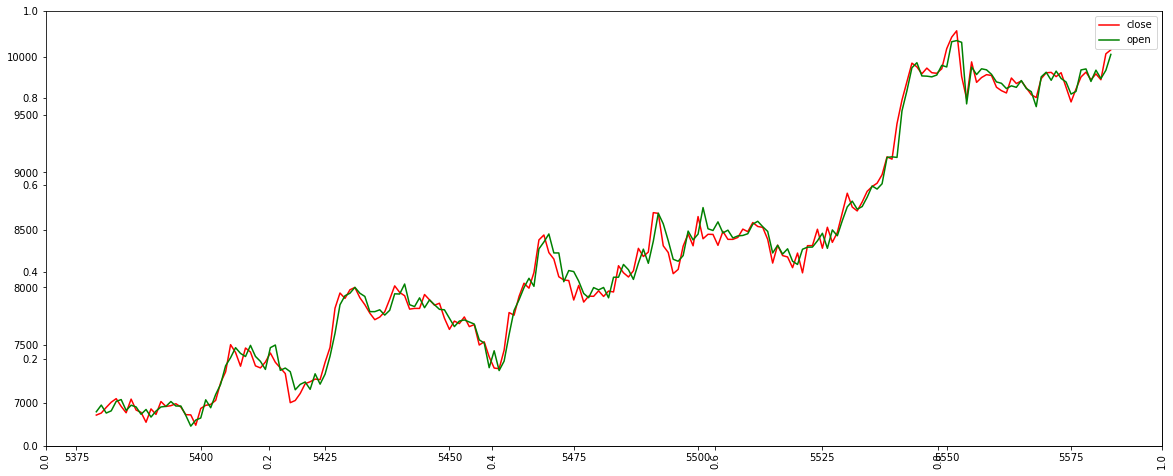

In [12]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Close'], color='red', label='close')
ax1.plot(df['Open'], color='green', label='open')
plt.legend()
plt.show()

In [13]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

61

In [14]:
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
5379,2020-10-02,6920.0,7003.0,6862.0,6891.0,6781.102539,4895000.0
5380,2020-10-05,6978.0,6983.0,6886.0,6909.0,6798.815430,4027200.0
5381,2020-10-06,6909.0,6984.0,6887.0,6958.0,6847.033691,4710200.0
5382,2020-10-07,6928.0,7003.0,6904.0,7003.0,6891.316406,4245200.0
5383,2020-10-08,7010.0,7078.0,6985.0,7034.0,6921.821777,4820300.0
...,...,...,...,...,...,...,...
5435,2020-12-23,7790.0,7815.0,7701.0,7720.0,7596.881348,3548800.0
5436,2020-12-24,7806.0,7815.0,7725.0,7743.0,7619.514648,2735200.0
5437,2020-12-25,7760.0,7797.0,7750.0,7789.0,7664.781250,1993300.0
5438,2020-12-28,7802.0,7898.0,7779.0,7898.0,7772.042480,3645300.0


In [15]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
5379,2020-10-02,6920.0,7003.0,6862.0,6891.0,6781.102539,4895000.0
5380,2020-10-05,6978.0,6983.0,6886.0,6909.0,6798.815430,4027200.0
5381,2020-10-06,6909.0,6984.0,6887.0,6958.0,6847.033691,4710200.0
5382,2020-10-07,6928.0,7003.0,6904.0,7003.0,6891.316406,4245200.0
5383,2020-10-08,7010.0,7078.0,6985.0,7034.0,6921.821777,4820300.0
...,...,...,...,...,...,...,...
5518,2021-04-26,8336.0,8343.0,8253.0,8265.0,8265.000000,3561700.0
5519,2021-04-27,8228.0,8256.0,8164.0,8172.0,8172.000000,4367000.0
5520,2021-04-28,8200.0,8318.0,8184.0,8299.0,8299.000000,5325600.0
5521,2021-04-30,8332.0,8332.0,8110.0,8127.0,8127.000000,6813600.0


In [16]:
test_set = test_data['Open']
test_set

5379    6920.0
5380    6978.0
5381    6909.0
5382    6928.0
5383    7010.0
         ...  
5435    7790.0
5436    7806.0
5437    7760.0
5438    7802.0
5439    7945.0
Name: Open, Length: 61, dtype: float64

In [17]:
train_set = train_data['Open']
train_set

5379    6920.0
5380    6978.0
5381    6909.0
5382    6928.0
5383    7010.0
         ...  
5518    8336.0
5519    8228.0
5520    8200.0
5521    8332.0
5522    8350.0
Name: Open, Length: 144, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

train_set = train_set.values.reshape(-1,1)
train_set

array([[6920.],
       [6978.],
       [6909.],
       [6928.],
       [7010.],
       [7026.],
       [6932.],
       [6977.],
       [6962.],
       [6898.],
       [6940.],
       [6874.],
       [6926.],
       [6962.],
       [6967.],
       [7009.],
       [6970.],
       [6970.],
       [6888.],
       [6795.],
       [6848.],
       [6866.],
       [7024.],
       [6955.],
       [7070.],
       [7159.],
       [7320.],
       [7390.],
       [7477.],
       [7427.],
       [7400.],
       [7497.],
       [7401.],
       [7358.],
       [7288.],
       [7477.],
       [7500.],
       [7280.],
       [7300.],
       [7268.],
       [7111.],
       [7158.],
       [7179.],
       [7115.],
       [7250.],
       [7160.],
       [7247.],
       [7403.],
       [7602.],
       [7850.],
       [7928.],
       [7950.],
       [8001.],
       [7950.],
       [7922.],
       [7790.],
       [7790.],
       [7806.],
       [7760.],
       [7802.],
       [7945.],
       [7943.],
       [

In [19]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.06582412],
       [0.09636651],
       [0.0600316 ],
       [0.07003686],
       [0.11321748],
       [0.12164297],
       [0.07214323],
       [0.09583992],
       [0.08794102],
       [0.05423907],
       [0.07635598],
       [0.04160084],
       [0.06898368],
       [0.08794102],
       [0.09057399],
       [0.11269089],
       [0.09215377],
       [0.09215377],
       [0.04897314],
       [0.        ],
       [0.02790943],
       [0.0373881 ],
       [0.12058978],
       [0.08425487],
       [0.14481306],
       [0.19167983],
       [0.2764613 ],
       [0.3133228 ],
       [0.35913639],
       [0.33280674],
       [0.31858873],
       [0.36966825],
       [0.31911532],
       [0.29647183],
       [0.25961032],
       [0.35913639],
       [0.37124803],
       [0.25539758],
       [0.26592944],
       [0.24907846],
       [0.16640337],
       [0.19115324],
       [0.20221169],
       [0.16850974],
       [0.23959979],
       [0.19220642],
       [0.23802001],
       [0.320

In [20]:
x_train = []
y_train = []
for i in range(n, len(train_set)):
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train

array([[0.06582412, 0.09636651, 0.0600316 , ..., 0.09215377, 0.09215377,
        0.04897314],
       [0.09636651, 0.0600316 , 0.07003686, ..., 0.09215377, 0.04897314,
        0.        ],
       [0.0600316 , 0.07003686, 0.11321748, ..., 0.04897314, 0.        ,
        0.02790943],
       ...,
       [0.87888362, 1.        , 0.9031069 , ..., 0.82727751, 0.78725645,
        0.81147973],
       [1.        , 0.9031069 , 0.895208  , ..., 0.78725645, 0.81147973,
        0.75460769],
       [0.9031069 , 0.895208  , 0.93470247, ..., 0.81147973, 0.75460769,
        0.73986309]])

In [22]:
y_train

array([0.02790943, 0.0373881 , 0.12058978, 0.08425487, 0.14481306,
       0.19167983, 0.2764613 , 0.3133228 , 0.35913639, 0.33280674,
       0.31858873, 0.36966825, 0.31911532, 0.29647183, 0.25961032,
       0.35913639, 0.37124803, 0.25539758, 0.26592944, 0.24907846,
       0.16640337, 0.19115324, 0.20221169, 0.16850974, 0.23959979,
       0.19220642, 0.23802001, 0.32016851, 0.42496051, 0.55555556,
       0.59662981, 0.60821485, 0.63507109, 0.60821485, 0.59347025,
       0.52395998, 0.52395998, 0.53238547, 0.50816219, 0.53027909,
       0.60558189, 0.6045287 , 0.65034229, 0.55555556, 0.54713007,
       0.58715113, 0.54186414, 0.57767246, 0.55555556, 0.53449184,
       0.53238547, 0.49394418, 0.4555029 , 0.48077936, 0.48604529,
       0.47656661, 0.46708794, 0.39494471, 0.38020011, 0.26750922,
       0.34491838, 0.25434439, 0.29752501, 0.41864139, 0.52922591,
       0.57819905, 0.6340179 , 0.67667193, 0.63981043, 0.81095313,
       0.84254871, 0.87941022, 0.79252238, 0.79252238, 0.66087

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.06582412],
        [0.09636651],
        [0.0600316 ],
        ...,
        [0.09215377],
        [0.09215377],
        [0.04897314]],

       [[0.09636651],
        [0.0600316 ],
        [0.07003686],
        ...,
        [0.09215377],
        [0.04897314],
        [0.        ]],

       [[0.0600316 ],
        [0.07003686],
        [0.11321748],
        ...,
        [0.04897314],
        [0.        ],
        [0.02790943]],

       ...,

       [[0.87888362],
        [1.        ],
        [0.9031069 ],
        ...,
        [0.82727751],
        [0.78725645],
        [0.81147973]],

       [[1.        ],
        [0.9031069 ],
        [0.895208  ],
        ...,
        [0.78725645],
        [0.81147973],
        [0.75460769]],

       [[0.9031069 ],
        [0.895208  ],
        [0.93470247],
        ...,
        [0.81147973],
        [0.75460769],
        [0.73986309]]])

In [24]:
x_train[0]

array([[0.06582412],
       [0.09636651],
       [0.0600316 ],
       [0.07003686],
       [0.11321748],
       [0.12164297],
       [0.07214323],
       [0.09583992],
       [0.08794102],
       [0.05423907],
       [0.07635598],
       [0.04160084],
       [0.06898368],
       [0.08794102],
       [0.09057399],
       [0.11269089],
       [0.09215377],
       [0.09215377],
       [0.04897314]])

In [25]:
y_train[0]

0.02790942601369162

## modeling

In [26]:
import tensorflow as tf

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=100, input_shape=(x_train.shape[1], 1)))

In [28]:
model.add(tf.keras.layers.Dense(units=1))

In [29]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 0.1434
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0357
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0171
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0155
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 13/100
8/8 [==============================] - 0s 5ms/st

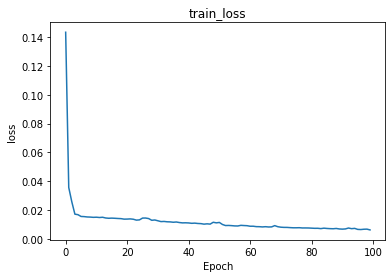

In [32]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [33]:
mymodel.history

{'loss': [0.14336459338665009,
  0.03566711023449898,
  0.025691919028759003,
  0.01714860461652279,
  0.016790464520454407,
  0.015557114034891129,
  0.015455314889550209,
  0.015211558900773525,
  0.015122420154511929,
  0.014950309880077839,
  0.015040436759591103,
  0.014834641478955746,
  0.01500607654452324,
  0.014501811005175114,
  0.01430564559996128,
  0.014400625601410866,
  0.014292505569756031,
  0.014151903800666332,
  0.014048473909497261,
  0.013698254711925983,
  0.01374225877225399,
  0.013864489272236824,
  0.013634870760142803,
  0.013014892116189003,
  0.013181346468627453,
  0.014437146484851837,
  0.014465694315731525,
  0.0140927042812109,
  0.012904363684356213,
  0.013115613721311092,
  0.012562569230794907,
  0.01199633814394474,
  0.012101871892809868,
  0.011862870305776596,
  0.011785580776631832,
  0.011543034575879574,
  0.011711405590176582,
  0.011339310556650162,
  0.01110130175948143,
  0.011159167625010014,
  0.011057715862989426,
  0.01080500241369

In [34]:
total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set

5379    6920.0
5380    6978.0
5381    6909.0
5382    6928.0
5383    7010.0
         ...  
5435    7790.0
5436    7806.0
5437    7760.0
5438    7802.0
5439    7945.0
Name: Open, Length: 205, dtype: float64

In [35]:
inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values
inputs

array([8528., 8487., 8300., 8366., 8290., 8336., 8228., 8200., 8332.,
       8350., 6920., 6978., 6909., 6928., 7010., 7026., 6932., 6977.,
       6962., 6898., 6940., 6874., 6926., 6962., 6967., 7009., 6970.,
       6970., 6888., 6795., 6848., 6866., 7024., 6955., 7070., 7159.,
       7320., 7390., 7477., 7427., 7400., 7497., 7401., 7358., 7288.,
       7477., 7500., 7280., 7300., 7268., 7111., 7158., 7179., 7115.,
       7250., 7160., 7247., 7403., 7602., 7850., 7928., 7950., 8001.,
       7950., 7922., 7790., 7790., 7806., 7760., 7802., 7945.])

In [36]:
inputs = inputs.reshape(-1,1)
inputs

array([[8528.],
       [8487.],
       [8300.],
       [8366.],
       [8290.],
       [8336.],
       [8228.],
       [8200.],
       [8332.],
       [8350.],
       [6920.],
       [6978.],
       [6909.],
       [6928.],
       [7010.],
       [7026.],
       [6932.],
       [6977.],
       [6962.],
       [6898.],
       [6940.],
       [6874.],
       [6926.],
       [6962.],
       [6967.],
       [7009.],
       [6970.],
       [6970.],
       [6888.],
       [6795.],
       [6848.],
       [6866.],
       [7024.],
       [6955.],
       [7070.],
       [7159.],
       [7320.],
       [7390.],
       [7477.],
       [7427.],
       [7400.],
       [7497.],
       [7401.],
       [7358.],
       [7288.],
       [7477.],
       [7500.],
       [7280.],
       [7300.],
       [7268.],
       [7111.],
       [7158.],
       [7179.],
       [7115.],
       [7250.],
       [7160.],
       [7247.],
       [7403.],
       [7602.],
       [7850.],
       [7928.],
       [7950.],
       [

In [37]:
inputs = sc.transform(inputs)
inputs

array([[0.91258557],
       [0.89099526],
       [0.79252238],
       [0.82727751],
       [0.78725645],
       [0.81147973],
       [0.75460769],
       [0.73986309],
       [0.80937335],
       [0.81885203],
       [0.06582412],
       [0.09636651],
       [0.0600316 ],
       [0.07003686],
       [0.11321748],
       [0.12164297],
       [0.07214323],
       [0.09583992],
       [0.08794102],
       [0.05423907],
       [0.07635598],
       [0.04160084],
       [0.06898368],
       [0.08794102],
       [0.09057399],
       [0.11269089],
       [0.09215377],
       [0.09215377],
       [0.04897314],
       [0.        ],
       [0.02790943],
       [0.0373881 ],
       [0.12058978],
       [0.08425487],
       [0.14481306],
       [0.19167983],
       [0.2764613 ],
       [0.3133228 ],
       [0.35913639],
       [0.33280674],
       [0.31858873],
       [0.36966825],
       [0.31911532],
       [0.29647183],
       [0.25961032],
       [0.35913639],
       [0.37124803],
       [0.255

In [38]:
x_test = []
for i in range(10, len(inputs)):
    x_test.append(inputs[i-10:i-1, 0])
x_test = np.array(x_test)
x_test

array([[0.91258557, 0.89099526, 0.79252238, 0.82727751, 0.78725645,
        0.81147973, 0.75460769, 0.73986309, 0.80937335],
       [0.89099526, 0.79252238, 0.82727751, 0.78725645, 0.81147973,
        0.75460769, 0.73986309, 0.80937335, 0.81885203],
       [0.79252238, 0.82727751, 0.78725645, 0.81147973, 0.75460769,
        0.73986309, 0.80937335, 0.81885203, 0.06582412],
       [0.82727751, 0.78725645, 0.81147973, 0.75460769, 0.73986309,
        0.80937335, 0.81885203, 0.06582412, 0.09636651],
       [0.78725645, 0.81147973, 0.75460769, 0.73986309, 0.80937335,
        0.81885203, 0.06582412, 0.09636651, 0.0600316 ],
       [0.81147973, 0.75460769, 0.73986309, 0.80937335, 0.81885203,
        0.06582412, 0.09636651, 0.0600316 , 0.07003686],
       [0.75460769, 0.73986309, 0.80937335, 0.81885203, 0.06582412,
        0.09636651, 0.0600316 , 0.07003686, 0.11321748],
       [0.73986309, 0.80937335, 0.81885203, 0.06582412, 0.09636651,
        0.0600316 , 0.07003686, 0.11321748, 0.12164297],


In [39]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.91258557],
        [0.89099526],
        [0.79252238],
        [0.82727751],
        [0.78725645],
        [0.81147973],
        [0.75460769],
        [0.73986309],
        [0.80937335]],

       [[0.89099526],
        [0.79252238],
        [0.82727751],
        [0.78725645],
        [0.81147973],
        [0.75460769],
        [0.73986309],
        [0.80937335],
        [0.81885203]],

       [[0.79252238],
        [0.82727751],
        [0.78725645],
        [0.81147973],
        [0.75460769],
        [0.73986309],
        [0.80937335],
        [0.81885203],
        [0.06582412]],

       [[0.82727751],
        [0.78725645],
        [0.81147973],
        [0.75460769],
        [0.73986309],
        [0.80937335],
        [0.81885203],
        [0.06582412],
        [0.09636651]],

       [[0.78725645],
        [0.81147973],
        [0.75460769],
        [0.73986309],
        [0.80937335],
        [0.81885203],
        [0.06582412],
        [0.09636651],
        [0.0600316 ]],



In [40]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

array([[ 0.5979696 ],
       [ 0.6196807 ],
       [ 0.2778803 ],
       [ 0.0896234 ],
       [-0.00792172],
       [-0.03650737],
       [-0.01110763],
       [ 0.03630728],
       [ 0.06951346],
       [ 0.1092282 ],
       [ 0.13684511],
       [ 0.12027524],
       [ 0.11630972],
       [ 0.10305376],
       [ 0.10522832],
       [ 0.11866778],
       [ 0.13171144],
       [ 0.14720747],
       [ 0.15061787],
       [ 0.14838816],
       [ 0.12740847],
       [ 0.09306283],
       [ 0.07746038],
       [ 0.07737323],
       [ 0.11363758],
       [ 0.13466696],
       [ 0.16915336],
       [ 0.20766178],
       [ 0.26087087],
       [ 0.304185  ],
       [ 0.3385631 ],
       [ 0.33783534],
       [ 0.31437054],
       [ 0.30904922],
       [ 0.28183144],
       [ 0.25260738],
       [ 0.21993476],
       [ 0.24269636],
       [ 0.27192467],
       [ 0.24443135],
       [ 0.22329691],
       [ 0.20378634],
       [ 0.1611166 ],
       [ 0.14443482],
       [ 0.14666037],
       [ 0

In [41]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[7930.544 ],
       [7971.774 ],
       [7322.695 ],
       [6965.195 ],
       [6779.957 ],
       [6725.673 ],
       [6773.9067],
       [6863.9473],
       [6927.006 ],
       [7002.4243],
       [7054.869 ],
       [7023.403 ],
       [7015.872 ],
       [6990.6987],
       [6994.8286],
       [7020.35  ],
       [7045.1196],
       [7074.547 ],
       [7081.0234],
       [7076.789 ],
       [7036.948 ],
       [6971.726 ],
       [6942.097 ],
       [6941.9316],
       [7010.798 ],
       [7050.7324],
       [7116.222 ],
       [7189.3496],
       [7290.3936],
       [7372.6475],
       [7437.931 ],
       [7436.5493],
       [7391.9897],
       [7381.8843],
       [7330.1978],
       [7274.7017],
       [7212.6562],
       [7255.8804],
       [7311.385 ],
       [7259.1753],
       [7219.041 ],
       [7181.99  ],
       [7100.9604],
       [7069.2817],
       [7073.5083],
       [7068.672 ],
       [7128.03  ],
       [7143.764 ],
       [7180.2295],
       [7266.758 ],


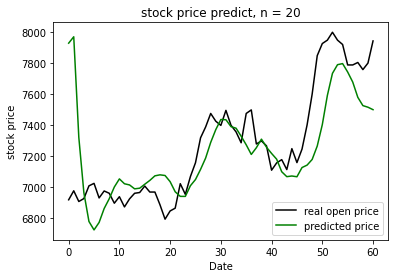

In [42]:
plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()